In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

Hint: import numpy as np import matplotlib.pyplot as plt from mpl_toolkits.mplot3d import Axes3D from sklearn import decomposition from sklearn import datasets

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
data.columns=["sepal_length","sepal_width","petal_length","petal_width","species_name"]    #to add respective column names 
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [13]:
x = data.loc[:, ["sepal_length","sepal_width","petal_length","petal_width"]].values
y = data.loc[:,['species_name']].values
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
principalComponents = pca.fit_transform(x)
newdata = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
finaldata = pd.concat([newdata, data["species_name"]],axis=1)

In [14]:
newdata.head()

,principal component 1,principal component 2,principal component 3
0,-2.733634,-0.163311,-0.203878
1,-2.908037,-0.130769,0.024327
2,-2.764918,-0.304759,0.037354
3,-2.746108,0.340280,0.095723
4,-2.296797,0.753485,0.173740


In [15]:
x_vals = finaldata['principal component 1']
y_vals = finaldata['principal component 2']
z_vals = finaldata['principal component 3']

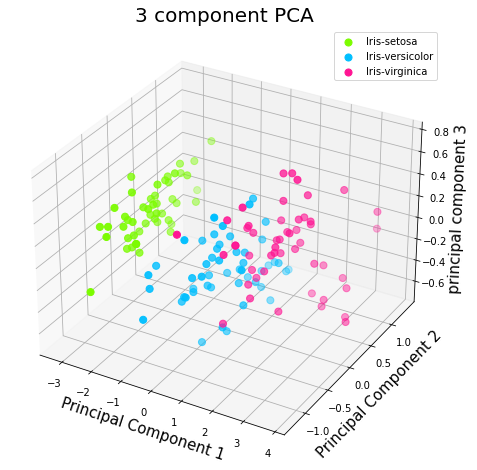

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
# Create the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('principal component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['lawngreen', 'deepskyblue', 'deeppink']
for species_name, color in zip(targets,colors):
    indicesToKeep = finaldata['species_name'] == species_name
    ax.scatter(finaldata.loc[indicesToKeep, 'principal component 1']
               , finaldata.loc[indicesToKeep, 'principal component 2']
               , finaldata.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()